# Modelando o CSV
Modificações iniciais no dataset para adequá-lo mais ao modelo.



**Importação de bibliotecas do Python:**

* Drive: Para acessar o Google Drive onde o CSV está localizado
* Pandas: Para a manipulação e análise dos dados
* Matplotlib: Para a criação de gráficos
* Numpy: Para a manipulação de arrays




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Mounted at /content/drive


Leitura e visualização dos dados contidos no arquivo "df_dados_cliente_totais.csv".

In [ ]:
df_teste = pd.read_csv('drive/MyDrive/Colab Notebooks/df_dados_cliente_totais_novos.csv')
df_teste

,Unnamed: 0,Ano,Mês,Dia,Dia da Semana,Hora,Minuto,Total de Domicílios,Masculino,Feminino,AB,C1,C2,DE,4-11 anos,12-17 anos,18-24 anos,25-34 anos,35-49 anos,50-59 anos,60+ anos,Total de Indivíduos,Masculino FID,Feminino FID,AB FID,C1 FID,C2 FID,DE FID,4-11 anos FID,12-17 anos FID,18-24 anos FID,25-34 anos FID,35-49 anos FID,50-59 anos FID,60+ anos FID,Total de Domicílios SHR,Masculino SHR,Feminino SHR,AB SHR,C1 SHR,C2 SHR,DE SHR,4-11 anos SHR,12-17 anos SHR,18-24 anos SHR,25-34 anos SHR,35-49 anos SHR,50-59 anos SHR,60+ anos SHR,Programa,Gênero,Feriado
0,0,2015,1,1,Quinta,6,0,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,PROGRAMA 0,NOVELA,True
1,1,2015,1,1,Quinta,6,5,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,PROGRAMA 0,NOVELA,True
2,2,2015,1,1,Quinta,6,10,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,PROGRAMA 0,NOVELA,True
3,3,2015,1,1,Quinta,6,15,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,PROGRAMA 0,NOVELA,True
4,4,2015,1,1,Quinta,6,20,1.09,0.30,0.40,0.00,1.52,0.00,0.00,0.0,0.00,1.18,0.0,0.00,1.73,0.00,100.00,100.00,100.00,0.00,100.0,0.00,0.0,0.0,0.0,100.0,0.0,0.00,100.0,0.00,34.08,15.37,57.73,0.00,67.40,0.00,0.00,0.0,0.00,100.00,0.0,0.00,100.00,0.00,PROGRAMA 0,NOVELA,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788539,788539,2022,7,1,Sexta,5,35,1.67,0.17,0.92,0.30,0.41,1.03,0.53,0.0,0.96,0.25,0.0,1.41,0.00,0.71,76.00,100.00,72.93,100.00,100.0,70.95,60.0,0.0,100.0,20.0,0.0,100.00,0.0,60.00,24.30,5.70,17.88,12.09,27.88,18.67,6.49,0.0,19.77,21.12,0.0,43.45,0.00,13.73,PROGRAMA 11,JORNALISMO,False
788540,788540,2022,7,1,Sexta,5,40,1.97,0.17,1.07,0.30,0.41,1.45,0.35,0.0,0.96,1.25,0.0,1.41,0.00,0.47,86.88,100.00,85.20,100.00,100.0,100.00,40.0,0.0,100.0,100.0,0.0,100.00,0.0,40.00,27.12,5.70,20.04,12.09,27.88,24.45,4.33,0.0,19.77,57.25,0.0,43.45,0.00,9.15,PROGRAMA 11,JORNALISMO,False
788541,788541,2022,7,1,Sexta,5,45,2.22,0.17,1.26,0.30,0.41,1.45,0.88,0.0,0.96,1.25,0.0,1.41,0.00,1.18,100.00,100.00,100.00,100.00,100.0,100.00,100.0,0.0,100.0,100.0,0.0,100.00,0.0,100.00,29.25,5.78,21.89,9.77,27.88,24.45,10.97,0.0,19.77,57.25,0.0,34.61,0.00,22.88,PROGRAMA 11,JORNALISMO,False
788542,788542,2022,7,1,Sexta,5,50,2.71,0.37,1.42,0.54,0.41,1.81,0.88,0.0,0.96,1.25,0.0,1.74,0.00,1.88,82.97,73.76,85.57,60.25,100.0,88.33,100.0,0.0,100.0,100.0,0.0,77.78,0.0,80.11,32.82,11.08,24.66,16.59,27.88,28.75,10.82,0.0,17.46,57.25,0.0,42.75,0.00,32.10,PROGRAMA 11,JORNALISMO,False


In [ ]:
del df_teste["Unnamed: 0"]

Verificação da exclusão das colunas feitas acima.

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788544 entries, 0 to 788543
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Ano                      788544 non-null  int64  
 1   Mês                      788544 non-null  int64  
 2   Dia                      788544 non-null  int64  
 3   Dia da Semana            788544 non-null  object 
 4   Hora                     788544 non-null  int64  
 5   Minuto                   788544 non-null  int64  
 6   Total de Domicílios      788544 non-null  float64
 7   Masculino                788544 non-null  float64
 8   Feminino                 788544 non-null  float64
 9   AB                       788544 non-null  float64
 10  C1                       788544 non-null  float64
 11  C2                       788544 non-null  float64
 12  DE                       788544 non-null  float64
 13  4-11 anos                788544 non-null  float64
 14  12-1

Combinação das features de hora e minuto como medida mais coerente para o modelo. De acordo com testes empíricos realizados, todos os modelos testados, incluindo o de regressão linear, o parâmetro de "tempo" em nome de horas e minutos é melhor interpretado pelos modelos. 

In [ ]:
df_teste["Hora e Minuto"] = df_teste["Hora"] + df_teste["Minuto"]/60

Identificação dos períodos de horário nobre.

In [ ]:
df_teste.insert(len(df_teste.columns),"Horário Nobre", False)
df_teste.loc[(df_teste["Hora"] >= 18), "Horário Nobre"] = True

Estabelecimento de programas para o Dataframe de Teste. 

In [ ]:
df_teste["Programa 1"] = df_teste["Programa"].str.contains("PROGRAMA 63")
df_teste["Programa 2"] = df_teste["Programa"].str.contains("PROGRAMA 3")
df_teste["Programa 3"] = df_teste["Programa"].str.contains("PROGRAMA 1")
df_teste["Programa 4"] = df_teste["Programa"].str.contains("PROGRAMA 9")
df_teste["Programa 5"] = df_teste["Programa"].str.contains("PROGRAMA 214")

Conversão de algumas séries para string

In [ ]:
df_teste.drop(["Programa"], axis=1, inplace=True)
df_teste["Mês"] = df_teste["Mês"].astype(str)
df_teste["Dia"] = df_teste["Dia"].astype(str)
df_teste["Hora"] = df_teste["Hora"].astype(str)
df_teste["Minuto"] = df_teste["Minuto"].astype(str)
df_teste["Hora e Minuto"] = df_teste["Hora e Minuto"].astype(str)
df_teste["Ano"] = df_teste["Ano"].astype(str)

Aplicação do método de one-hot-encoding para a série de dias da semana (a única que o método abaixo vai encontrar para a aplicação.)

In [ ]:
df_teste = pd.get_dummies(df_teste)
df_teste.head(5)

,Total de Domicílios,Masculino,Feminino,AB,C1,C2,DE,4-11 anos,12-17 anos,18-24 anos,25-34 anos,35-49 anos,50-59 anos,60+ anos,Total de Indivíduos,Masculino FID,Feminino FID,AB FID,C1 FID,C2 FID,DE FID,4-11 anos FID,12-17 anos FID,18-24 anos FID,25-34 anos FID,35-49 anos FID,50-59 anos FID,60+ anos FID,Total de Domicílios SHR,Masculino SHR,Feminino SHR,AB SHR,C1 SHR,C2 SHR,DE SHR,4-11 anos SHR,12-17 anos SHR,18-24 anos SHR,25-34 anos SHR,35-49 anos SHR,50-59 anos SHR,60+ anos SHR,Feriado,Horário Nobre,Programa 1,Programa 2,Programa 3,Programa 4,Programa 5,Ano_2015,Ano_2016,Ano_2017,Ano_2018,Ano_2019,Ano_2020,Ano_2021,Ano_2022,Mês_1,Mês_10,Mês_11,Mês_12,Mês_2,Mês_3,Mês_4,Mês_5,Mês_6,Mês_7,Mês_8,Mês_9,Dia_1,Dia_10,Dia_11,Dia_12,Dia_13,Dia_14,Dia_15,Dia_16,Dia_17,Dia_18,Dia_19,Dia_2,Dia_20,Dia_21,Dia_22,Dia_23,Dia_24,Dia_25,Dia_26,Dia_27,Dia_28,Dia_29,Dia_3,Dia_30,Dia_31,Dia_4,Dia_5,Dia_6,Dia_7,Dia_8,Dia_9,Dia da Semana_Domingo,Dia da Semana_Quarta,Dia da Semana_Quinta,Dia da Semana_Segunda,Dia da Semana_Sexta,Dia da Semana_Sábado,Dia da Semana_Terça,Hora_0,Hora_1,Hora_10,Hora_11,Hora_12,Hora_13,Hora_14,Hora_15,Hora_16,Hora_17,Hora_18,Hora_19,Hora_2,Hora_20,Hora_21,Hora_22,Hora_23,Hora_3,Hora_4,Hora_5,Hora_6,Hora_7,Hora_8,Hora_9,Minuto_0,Minuto_10,Minuto_15,Minuto_20,Minuto_25,Minuto_30,Minuto_35,Minuto_40,Minuto_45,Minuto_5,Minuto_50,Minuto_55,Gênero_ AUDITORIO,Gênero_ CARROS E MOTORES,Gênero_ CULINARIO,Gênero_ DEBATE,Gênero_ DESENHO ADULTO,Gênero_ DOCUMENTARIO,Gênero_ EDUCATIVO,Gênero_ ENTREVISTA,Gênero_ ESPORTE,Gênero_ FEMININO,Gênero_ FILME,Gênero_ FUTEBOL,Gênero_ GAME SHOW,Gênero_ HUMORISTICO,Gênero_ INFANTIL,Gênero_ JORNALISMO,Gênero_ MINISSERIE,Gênero_ MUSICAL,Gênero_ NAO CONSTA,Gênero_ NOVELA,Gênero_ OUTROS,Gênero_ POLITICO,Gênero_ PREMIACAO,Gênero_ REALITY SHOW,Gênero_ RELIGIOSO,Gênero_ REPORTAGEM,Gênero_ RURAL,Gênero_ SAUDE,Gênero_ SERIES,Gênero_ SHOW,Gênero_ SORTEIO,Gênero_ TELE VENDAS,Hora e Minuto_0.0,Hora e Minuto_0.08333333333333333,Hora e Minuto_0.16666666666666666,Hora e Minuto_0.25,Hora e Minuto_0.3333333333333333,Hora e Minuto_0.4166666666666667,Hora e Minuto_0.5,Hora e Minuto_0.5833333333333334,Hora e Minuto_0.6666666666666666,Hora e Minuto_0.75,Hora e Minuto_0.8333333333333334,Hora e Minuto_0.9166666666666666,Hora e Minuto_1.0,Hora e Minuto_1.0833333333333333,Hora e Minuto_1.1666666666666667,Hora e Minuto_1.25,Hora e Minuto_1.3333333333333333,Hora e Minuto_1.4166666666666667,Hora e Minuto_1.5,Hora e Minuto_1.5833333333333335,Hora e Minuto_1.6666666666666665,Hora e Minuto_1.75,Hora e Minuto_1.8333333333333335,Hora e Minuto_1.9166666666666665,Hora e Minuto_10.0,Hora e Minuto_10.083333333333334,Hora e Minuto_10.166666666666666,Hora e Minuto_10.25,Hora e Minuto_10.333333333333334,Hora e Minuto_10.416666666666666,Hora e Minuto_10.5,Hora e Minuto_10.583333333333334,Hora e Minuto_10.666666666666666,Hora e Minuto_10.75,Hora e Minuto_10.833333333333334,Hora e Minuto_10.916666666666666,Hora e Minuto_11.0,Hora e Minuto_11.083333333333334,Hora e Minuto_11.166666666666666,Hora e Minuto_11.25,Hora e Minuto_11.333333333333334,Hora e Minuto_11.416666666666666,Hora e Minuto_11.5,Hora e Minuto_11.583333333333334,Hora e Minuto_11.666666666666666,Hora e Minuto_11.75,Hora e Minuto_11.833333333333334,Hora e Minuto_11.916666666666666,Hora e Minuto_12.0,Hora e Minuto_12.083333333333334,Hora e Minuto_12.166666666666666,Hora e Minuto_12.25,Hora e Minuto_12.333333333333334,Hora e Minuto_12.416666666666666,Hora e Minuto_12.5,Hora e Minuto_12.583333333333334,Hora e Minuto_12.666666666666666,Hora e Minuto_12.75,Hora e Minuto_12.833333333333334,Hora e Minuto_12.916666666666666,Hora e Minuto_13.0,Hora e Minuto_13.083333333333334,Hora e Minuto_13.166666666666666,Hora e Minuto_13.25,Hora e Minuto_13.333333333333334,Hora e Minuto_13.416666666666666,Hora e Minuto_13.5,Hora e Minuto_13.583333333333334,Hora e Minuto_13.666666666666666,Hora e Minuto_13.75,Hora e Minuto_13.833333333333334,Hora e Minuto_13.916666666666666,Hora e Minuto_14.0,Hora e Mi

# Regressão Linear

Cópia do dataframe de teste para a exclusão das séries não pertinentes para o treinamento.

In [ ]:
df_both = df_teste
#y = df_both[["Total de Domicílios","Masculino","Feminino","AB","C1","C2","DE","4-11 anos","12-17 anos","18-24 anos","25-34 anos","35-49 anos","50-59 anos","60+ anos","Total de Indivíduos","Masculino FID","Feminino FID","AB FID","C1 FID","C2 FID","DE FID","4-11 anos FID","12-17 anos FID","18-24 anos FID","25-34 anos FID","35-49 anos FID","50-59 anos FID","60+ anos FID"]]

y = df_both["Total de Domicílios"]
print(y[:5])

0    1.09
1    1.09
2    1.09
3    1.09
4    1.09
Name: Total de Domicílios, dtype: float64


Remoção da série "Total de Domicílios" e das outras informações que queremos prever para a utilização das outras séries para treino.

In [ ]:
df_both.drop(["Total de Domicílios"], axis=1, inplace=True)

df_both.drop(["Masculino"], axis=1, inplace=True)
df_both.drop(["Feminino"], axis=1, inplace=True)
df_both.drop(["AB"], axis=1, inplace=True)
df_both.drop(["C1"], axis=1, inplace=True)
df_both.drop(["C2"], axis=1, inplace=True)
df_both.drop(["DE"], axis=1, inplace=True)
df_both.drop(["4-11 anos"], axis=1, inplace=True)
df_both.drop(["12-17 anos"], axis=1, inplace=True)
df_both.drop(["18-24 anos"], axis=1, inplace=True)
df_both.drop(["25-34 anos"], axis=1, inplace=True)
df_both.drop(["35-49 anos"], axis=1, inplace=True)
df_both.drop(["50-59 anos"], axis=1, inplace=True)
df_both.drop(["60+ anos"], axis=1, inplace=True)

df_both.drop(["Total de Indivíduos"], axis=1, inplace=True)
df_both.drop(["Masculino FID"], axis=1, inplace=True)
df_both.drop(["Feminino FID"], axis=1, inplace=True)
df_both.drop(["AB FID"], axis=1, inplace=True)
df_both.drop(["C1 FID"], axis=1, inplace=True)
df_both.drop(["C2 FID"], axis=1, inplace=True)
df_both.drop(["DE FID"], axis=1, inplace=True)
df_both.drop(["4-11 anos FID"], axis=1, inplace=True)
df_both.drop(["12-17 anos FID"], axis=1, inplace=True)
df_both.drop(["18-24 anos FID"], axis=1, inplace=True)
df_both.drop(["25-34 anos FID"], axis=1, inplace=True)
df_both.drop(["35-49 anos FID"], axis=1, inplace=True)
df_both.drop(["50-59 anos FID"], axis=1, inplace=True)
df_both.drop(["60+ anos FID"], axis=1, inplace=True)

df_both.drop(["Total de Domicílios SHR"], axis=1, inplace=True)
df_both.drop(["Masculino SHR"], axis=1, inplace=True)
df_both.drop(["Feminino SHR"], axis=1, inplace=True)
df_both.drop(["AB SHR"], axis=1, inplace=True)
df_both.drop(["C1 SHR"], axis=1, inplace=True)
df_both.drop(["C2 SHR"], axis=1, inplace=True)
df_both.drop(["DE SHR"], axis=1, inplace=True)
df_both.drop(["4-11 anos SHR"], axis=1, inplace=True)
df_both.drop(["12-17 anos SHR"], axis=1, inplace=True)
df_both.drop(["18-24 anos SHR"], axis=1, inplace=True)
df_both.drop(["25-34 anos SHR"], axis=1, inplace=True)
df_both.drop(["35-49 anos SHR"], axis=1, inplace=True)
df_both.drop(["50-59 anos SHR"], axis=1, inplace=True)
df_both.drop(["60+ anos SHR"], axis=1, inplace=True)

In [ ]:
#divisão entre dados de treinamento e dados de resultado
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_both, y, test_size=0.15, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #função da regressão linear
lr.fit(X_train, y_train) #inserção dos valores para ensino

LinearRegression()

In [ ]:
#predição dos valores teste

test_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_test, test_pred)) #R quadrado
print(mean_absolute_error(y_test, test_pred)) #erro médio absoluto
print(mean_squared_error(y_test, test_pred)) #erro médio quadrático

0.8034453447785433
2.5324143968439827
12.51645640969268


In [ ]:
#predição dos valores teste
train_pred = lr.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(r2_score(y_train, train_pred)) #R quadrado
print(mean_absolute_error(y_train, train_pred)) #erro médio absoluto
print(mean_squared_error(y_train, train_pred)) #erro médio quadrático

0.8025933995915129
2.5319762514509248
12.478433094824597


# Gráficos e comparações

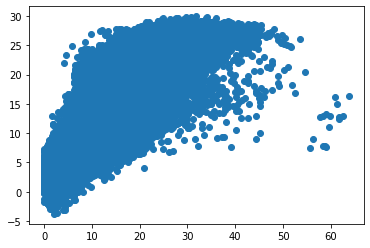

In [ ]:
plt.scatter(y_test,test_pred)

In [ ]:
results = {"Test Real Value": y_test, "Test Prediction": test_pred}
df_results = pd.DataFrame(data=results)

df_results.head(5)

,Test Real Value,Test Prediction
760068,2.22,1.812500
180554,0.33,2.437500
163468,12.72,14.023438
753433,1.97,1.210938
614691,10.38,11.132812


**Função de criação de gráficos de comparação**

In [ ]:
def grafico_metricas(valores_x, valores_y, tipo_dado, nome_modelo):

    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import linregress

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

    ax1.set_title("Relação linear entre as séries de dados reais e preditos \n para o conjunto de " + tipo_dado + \
                  " do modelo " + nome_modelo, fontsize=20, weight='bold')
    ax1.set_xlabel("Série de audiências reais para " + tipo_dado, fontsize=20)
    ax1.set_ylabel("Série de audiências preditas para" + tipo_dado, fontsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)

    slope, intercept, r_value, p_value, std_err = linregress(valores_x, valores_y)
    xaxis_regression = np.linspace(min(valores_x), max(valores_x), num=100)

    equation = ("y = " + "{:.5f}".format(slope) + "x" + " + (" + "{:.5f}".format(intercept) + ")")

    ax1.scatter(valores_x, valores_y, lw=3, color = "#2D243F", label = "timestamps")
    ax1.plot(xaxis_regression, intercept + slope * xaxis_regression, ls = "--", color="#E44B4A", lw=4, label = equation)

    ax1.annotate("r²=" + "{:.2f}".format(r_value**2), xy=(0.1, 0.79), xycoords='axes fraction', fontsize=20)
    ax1.annotate("ρ=" + "{:.2f}".format(p_value), xy=(0.1, 0.84), xycoords='axes fraction', fontsize=20)
    ax1.grid()
    ax1.legend(prop={"size": 15})

    difference_results = valores_x - valores_y
    
    ax2.set_title("Distribuição das diferenças entre séries reais e preditas \n para o conjunto de " + tipo_dado + \
              " do modelo " + nome_modelo, fontsize=20, weight='bold')
    
    ax2.set_xlabel("Diferença entre audiências reais e preditas (" + tipo_dado + ") ", fontsize=20)
    ax2.set_ylabel("Distribuição das diferenças", fontsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)

    difference_results_std = difference_results.std()
    difference_results_stde_mean = difference_results.sem()
    difference_results_var = difference_results.var()

    box_differences = ax2.boxplot(difference_results, medianprops=dict(color="#2D243F", linewidth=5), patch_artist = True)
    box_differences["boxes"][0].set_facecolor("#E44B4A")
    ax2.annotate("std σ=" + "{:.2f}".format(difference_results_std), xy=(0.7, 0.8), xycoords='axes fraction', fontsize=20)
    ax2.annotate("SE=" + "{:.2f}".format(difference_results_stde_mean), xy=(0.7, 0.75), xycoords='axes fraction', fontsize=20)
    ax2.annotate("var σ²=" + "{:.2f}".format(difference_results_var), xy=(0.7, 0.70), xycoords='axes fraction', fontsize=20)
    ax2.grid()

    plt.show()

    return "{:.2f}".format(r_value**2), p_value, difference_results_std, difference_results_stde_mean, difference_results_var

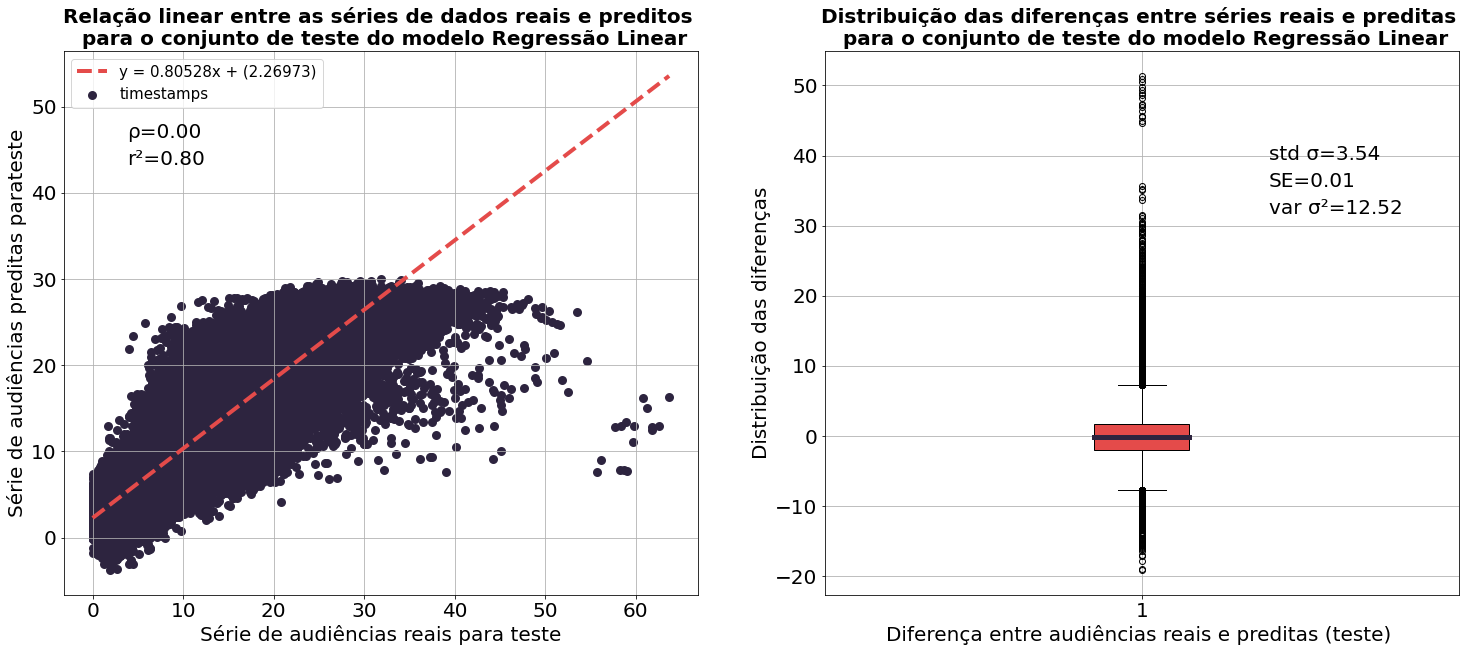

In [ ]:
a, b, c, d, e = grafico_metricas(y_test, test_pred, "teste", "Regressão Linear")

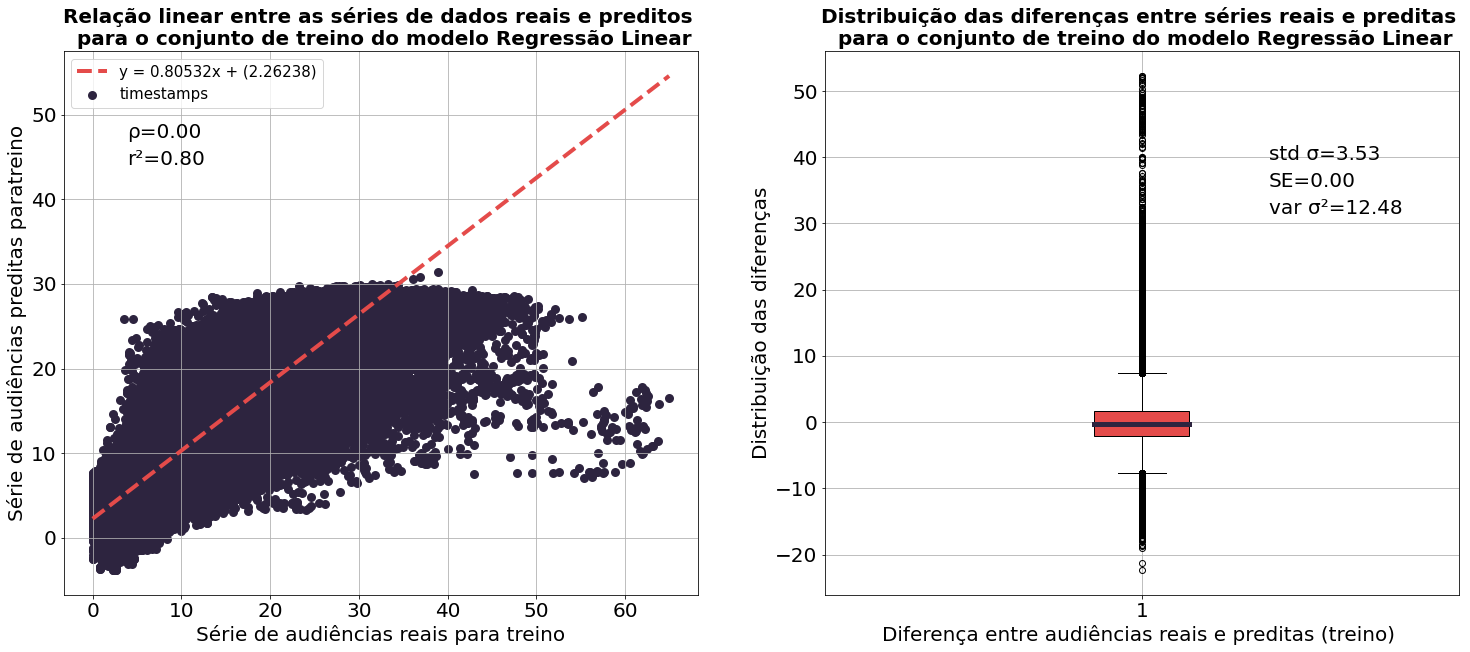

In [ ]:
f, g, h, i, j = grafico_metricas(y_train, train_pred, "treino", "Regressão Linear")

**Criação de dataframe com as informações de métricas do modelo no teste e no treino**

In [ ]:
dic_results_teste = {'Modelo': 'Regressão Linear', 'Tipo_de_dado':['Teste','Treino'], 'r²':[a,f], 'ρ':[b,g] ,'std σ':[c,h],'SE':[d,i], 'var':[e,j]}
results_teste_df = pd.DataFrame(data=dic_results_teste)
results_teste_df

,Modelo,Tipo_de_dado,r²,ρ,std σ,SE,var
0,Regressão Linear,Teste,0.80,0.0,3.537870,0.010287,12.516527
1,Regressão Linear,Treino,0.80,0.0,3.532485,0.004315,12.478449
